## Title: Personal Finance Savings Prediction Model
Name: Anirudh k kumar
Organization: Entri Elevate
Date: 20/12/2024

## OVERVIEW OF PROBLEM STATEMENT
Managing personal finances is critical for financial stability. Understanding factors influencing savings behavior can help individuals better allocate their income. This project aims to predict the Desired Savings Percentage using machine learning to provide actionable insights for improved financial planning.

## OBJECTIVE
To develop an ML model that predicts Desired Savings Percentage based on income, expenses, and demographics while identifying areas for potential savings.

## DATA DESCRIPTION
Source: From Kaggle https://www.kaggle.com/datasets/shriyashjagtap/indian-personal-finance-and-spending-habits/data
Features: 'Income', 'Age', 'Dependents', 'City_Tier', 'Rent', 'Loan_Repayment',
       'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
       'Utilities', 'Healthcare', 'Education', 'Miscellaneous',
       'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income',
       'Potential_Savings_Groceries', 'Potential_Savings_Transport',
       'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
       'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
       'Occupation_Retired', 'Occupation_Self_Employed', 'Occupation_udent']  ,
      dtype'object')

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform
import joblib
from sklearn.pipeline import Pipeline

## DATA COLLECTION

In [3]:
# Importing data
data= pd.read_csv('indianfinance.csv')

In [5]:
#Dataframe
df= pd.DataFrame(data)

In [7]:
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [12]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [13]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [14]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [15]:
df.shape

(20000, 27)

## DATA PREPROCESSING - DATA CLEANING

In [17]:
## Finding null and duplicates
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

## There are no null and duplicate values.

In [20]:
df.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

In [9]:
##Finding Outliers
numeric_values= df.select_dtypes(include=['number'])

In [11]:
numeric_values

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,1945.982149,1210.454952,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,3770.919375,2356.408295,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,896.290751,1571.911103,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,2545.419412,4721.792454,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


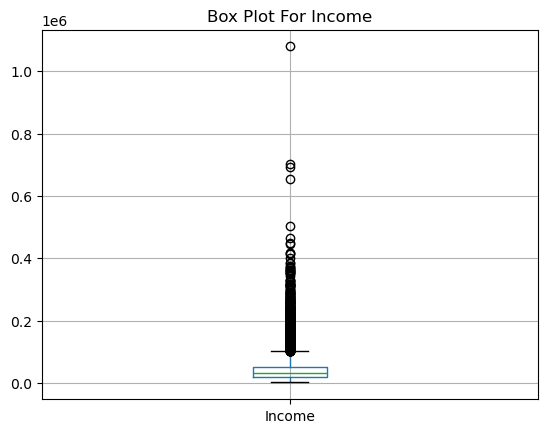

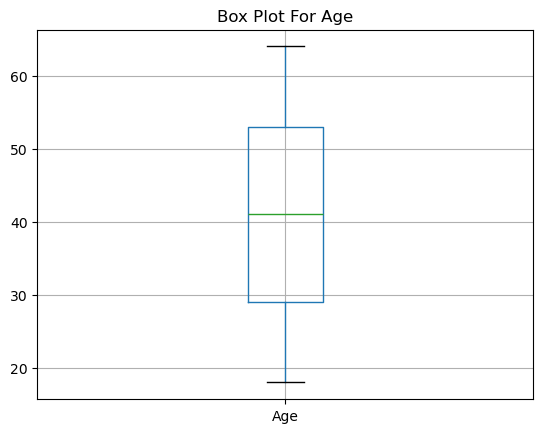

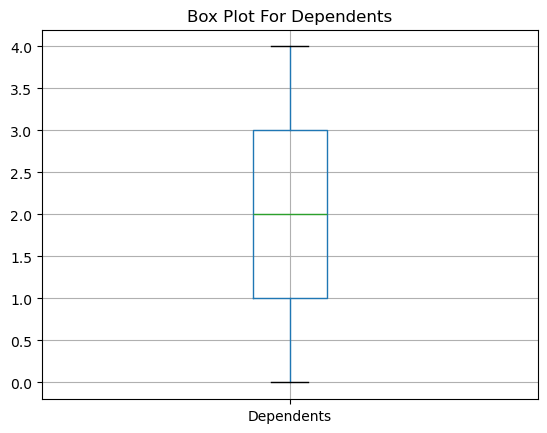

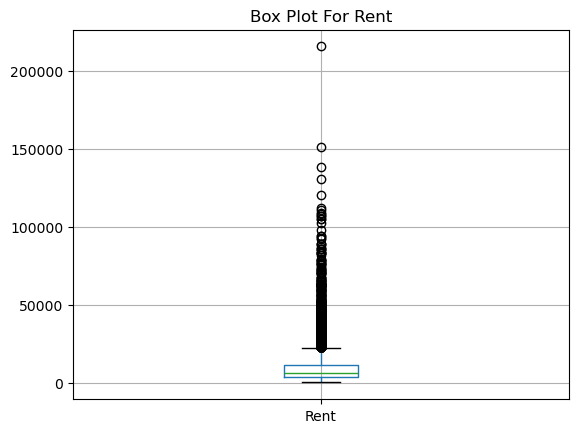

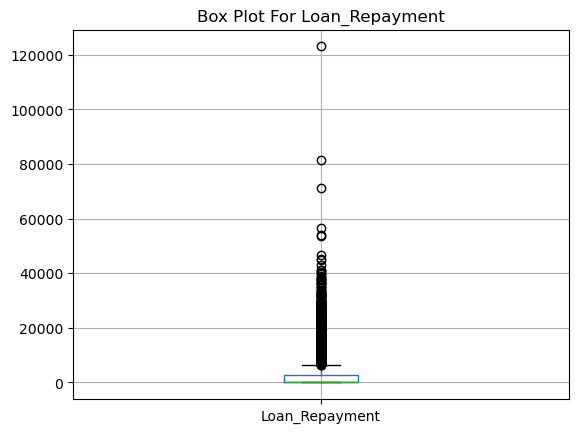

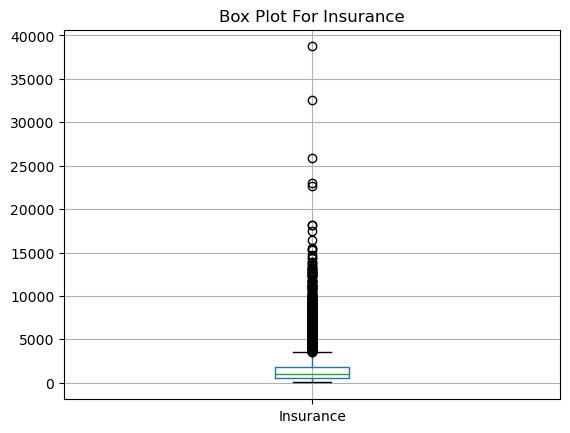

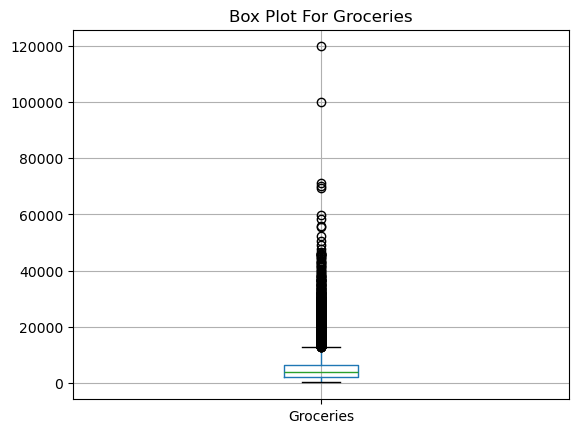

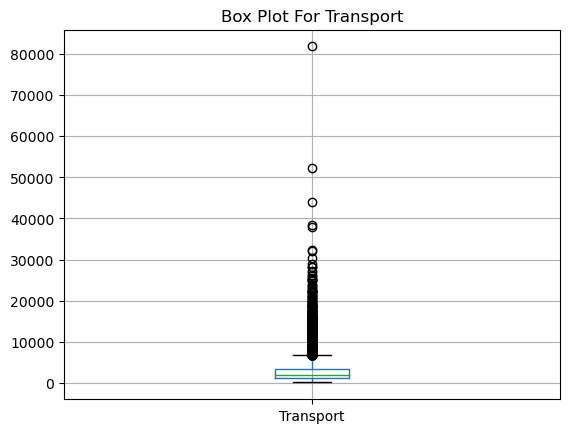

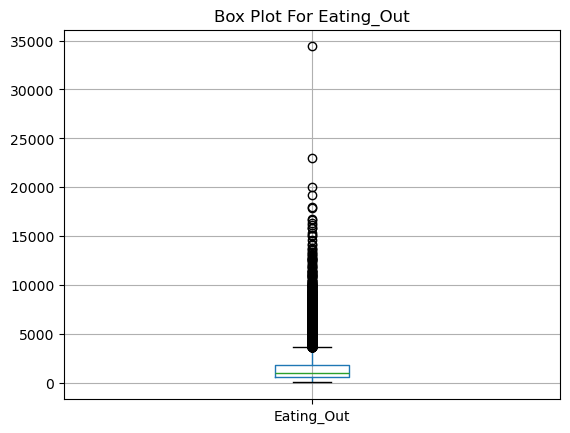

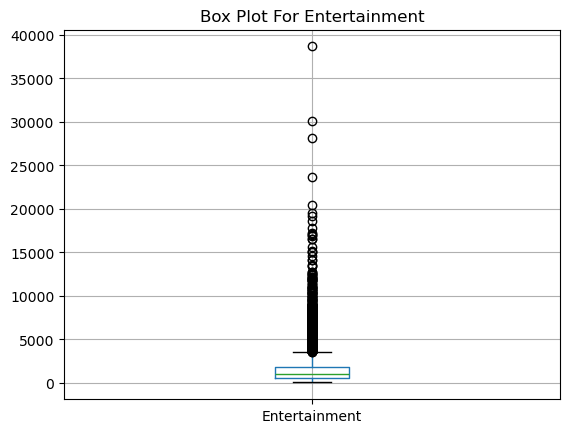

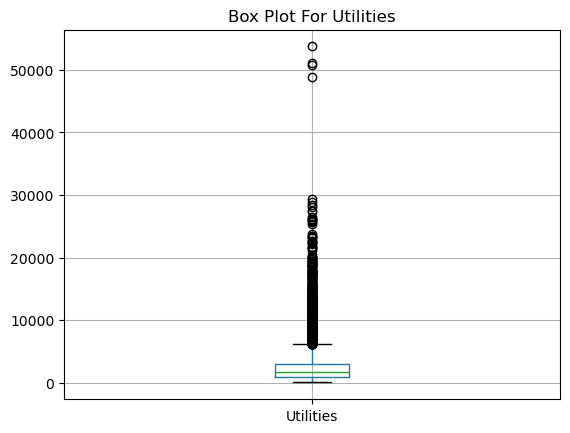

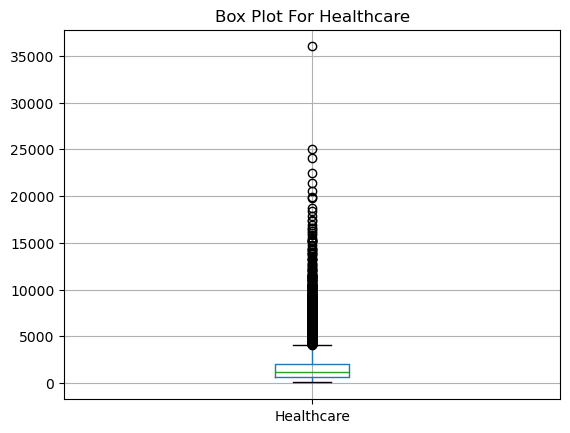

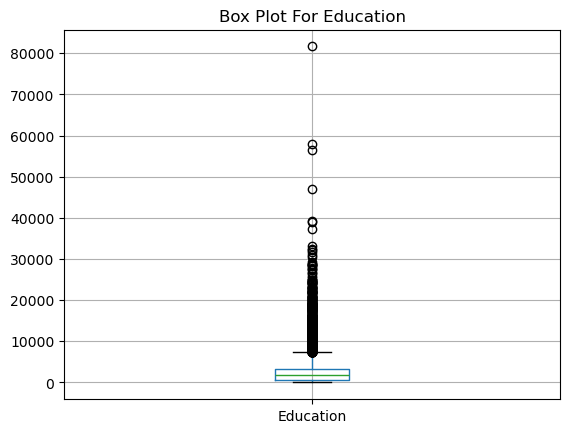

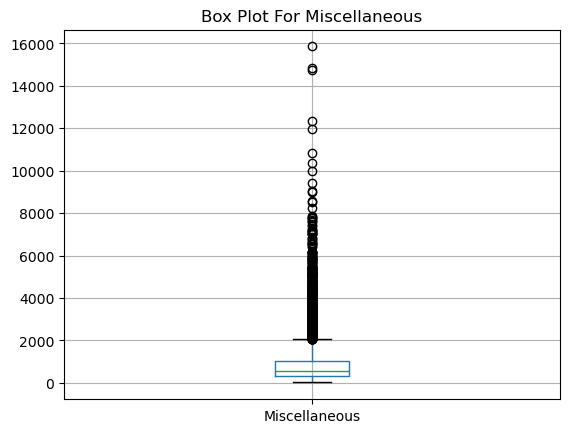

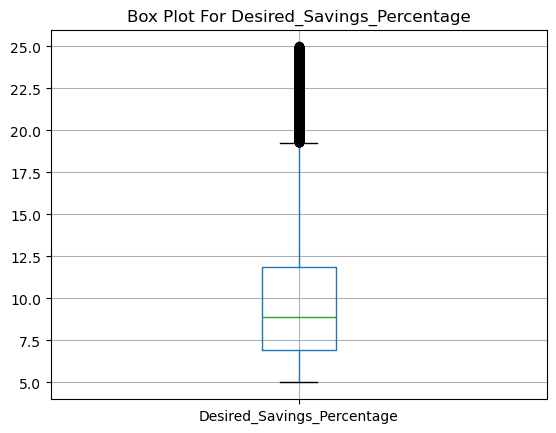

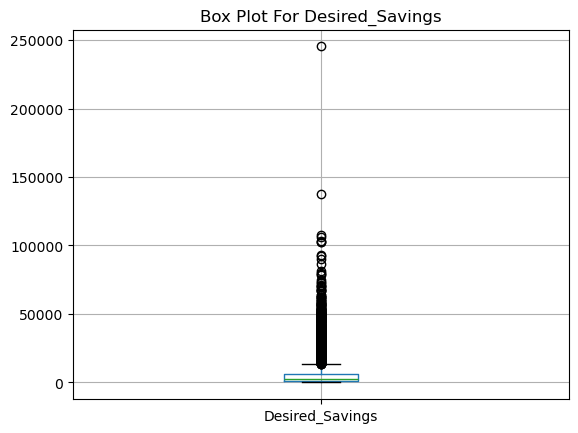

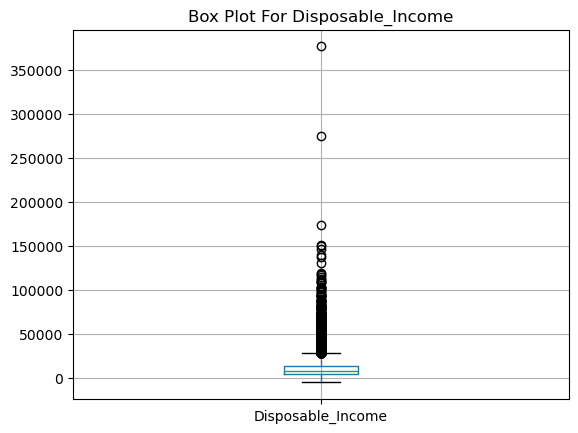

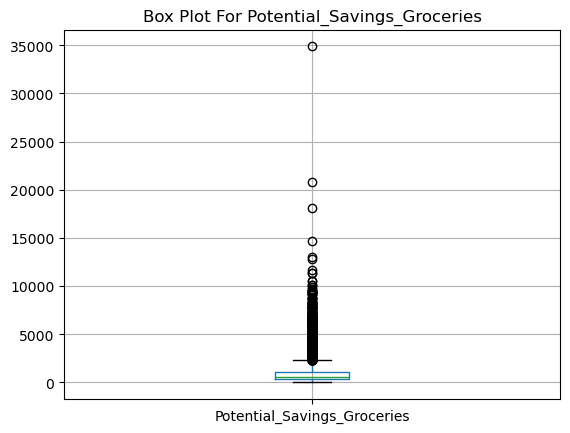

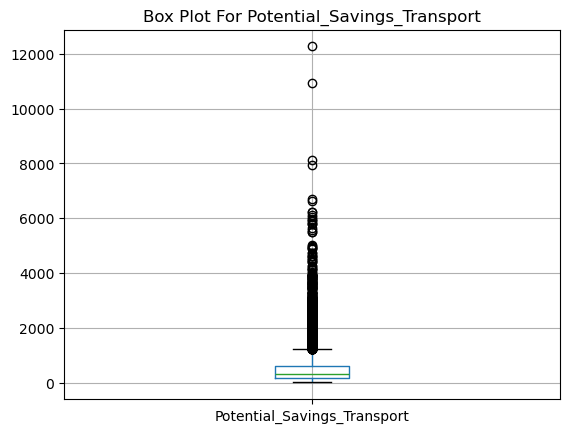

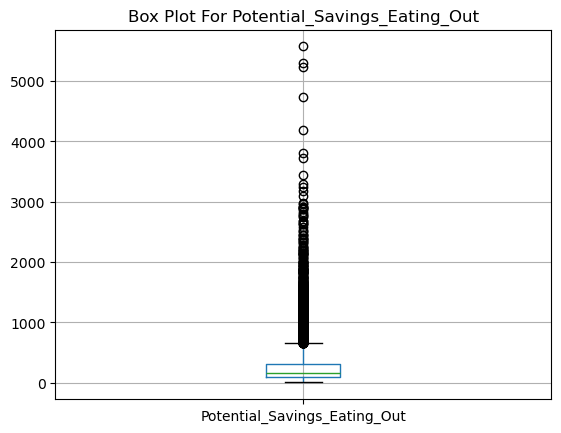

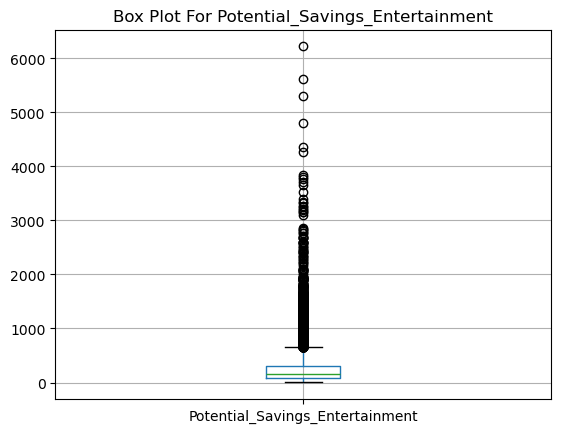

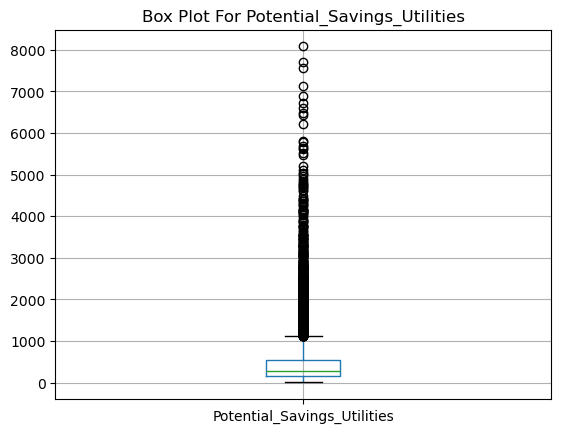

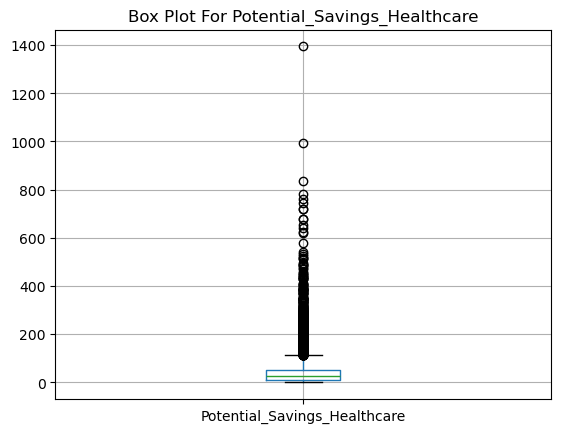

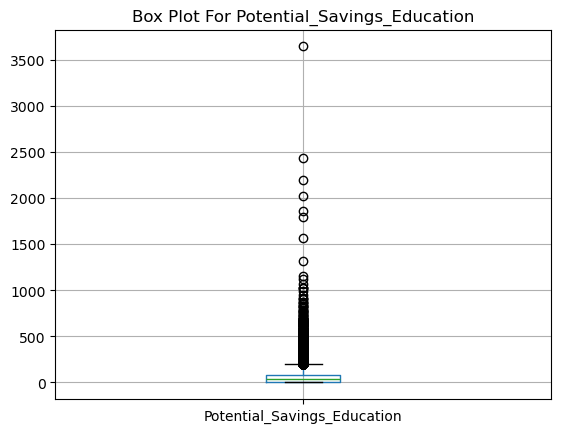

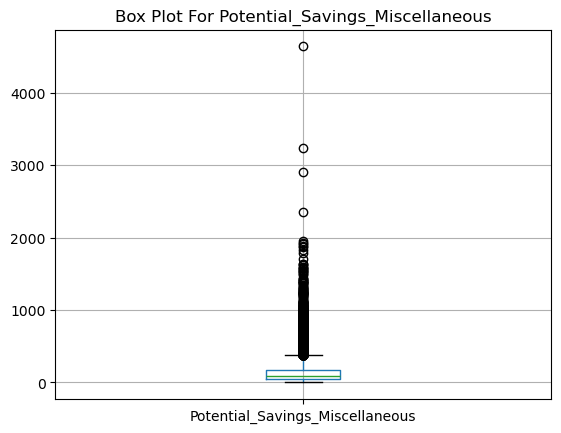

In [13]:
##for loop for numerical columns
for column in numeric_values.columns:
    plt.figure()
    numeric_values.boxplot(column= column)
    plt.title(f"Box Plot For {column}")
    plt.show()

In [24]:
## skewness
numeric_values.skew()

Income                             4.232803
Age                               -0.008878
Dependents                        -0.000117
Rent                               4.150531
Loan_Repayment                     5.099544
Insurance                          4.513667
Groceries                          3.960422
Transport                          4.736227
Eating_Out                         3.887579
Entertainment                      4.665013
Utilities                          4.347142
Healthcare                         3.883214
Education                          4.307865
Miscellaneous                      3.798297
Desired_Savings_Percentage         1.421412
Desired_Savings                    5.585197
Disposable_Income                  5.069602
Potential_Savings_Groceries        5.365886
Potential_Savings_Transport        4.364978
Potential_Savings_Eating_Out       4.228699
Potential_Savings_Entertainment    4.652173
Potential_Savings_Utilities        4.227651
Potential_Savings_Healthcare    

In [15]:
## Sorting outliers using IQR method
for column in numeric_values.columns:
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1

    lower= Q1 - (1.5*IQR)
    upper= Q3 + (1.5*IQR)
        
## Removing outliers(capping)
    df[column]= np.where(df[column] <lower, lower,
                         np.where(df[column] >upper, upper, df[column]))

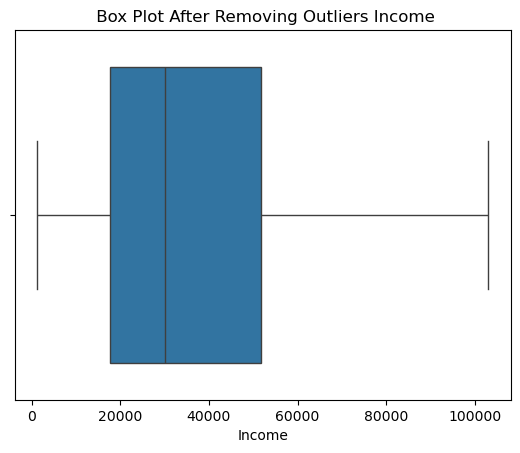

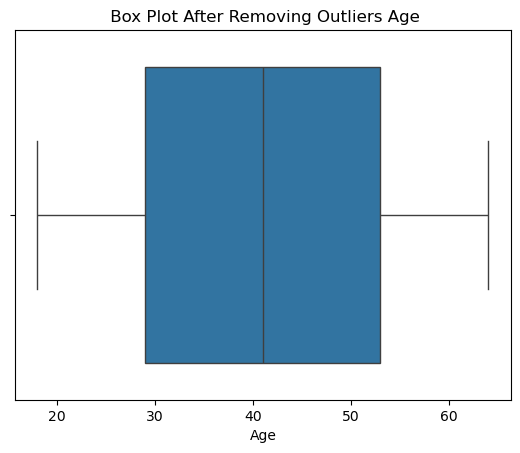

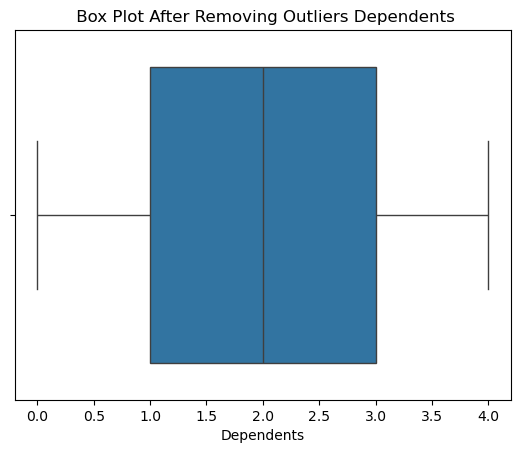

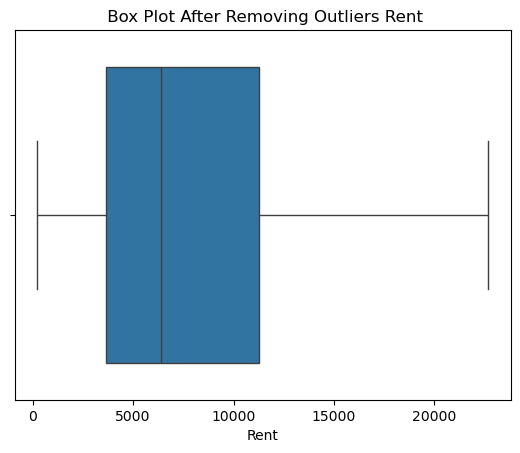

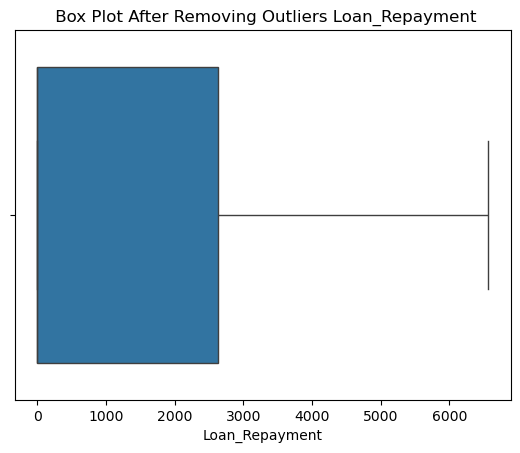

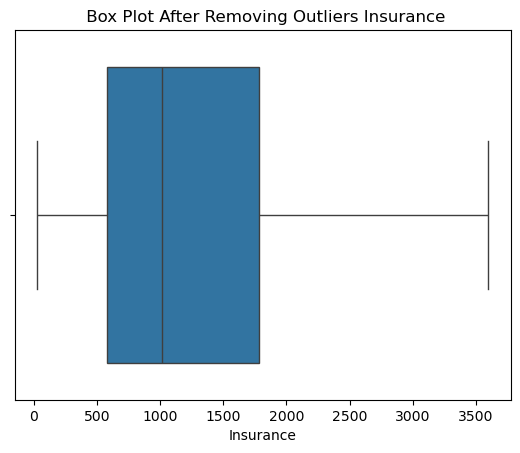

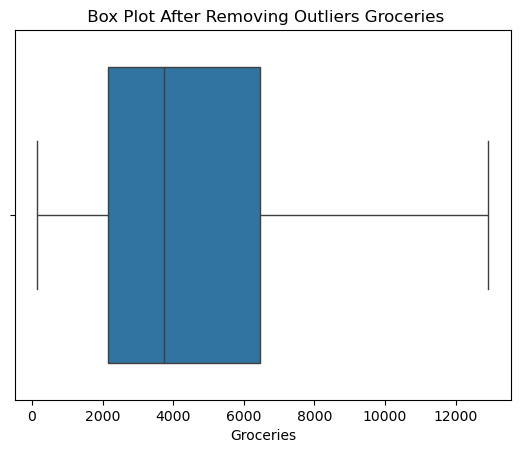

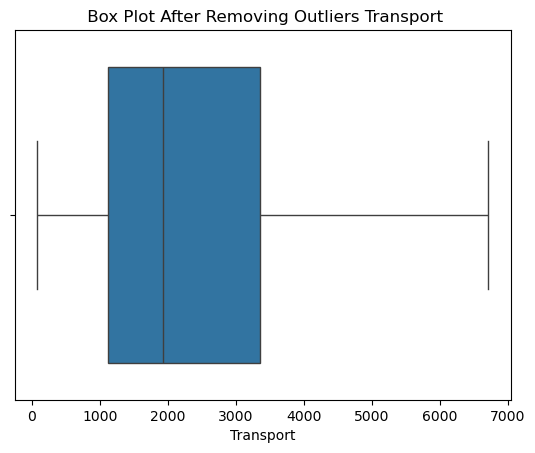

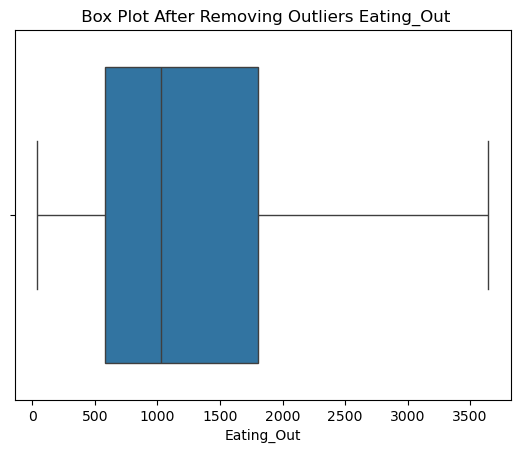

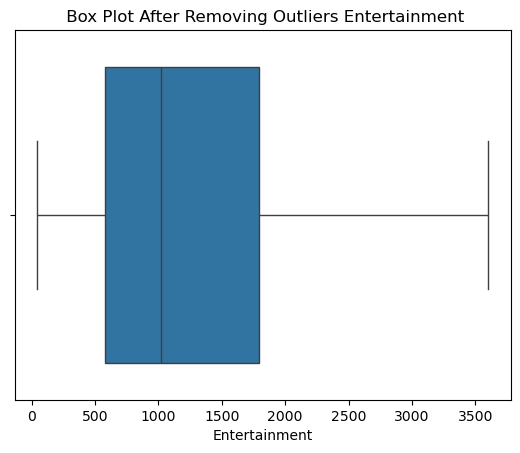

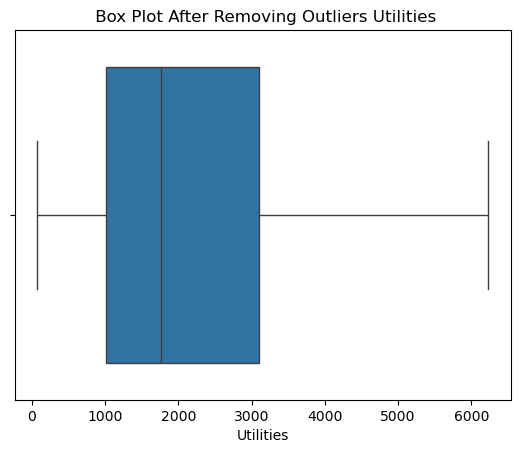

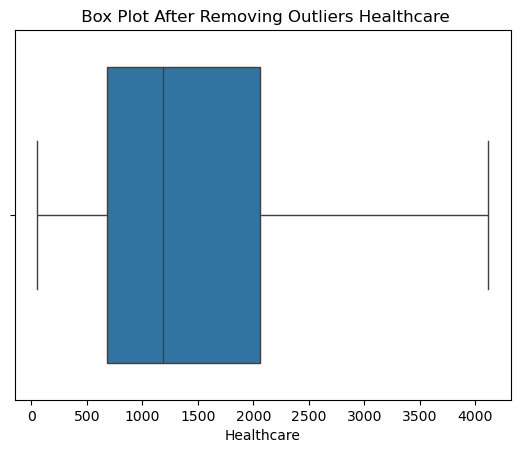

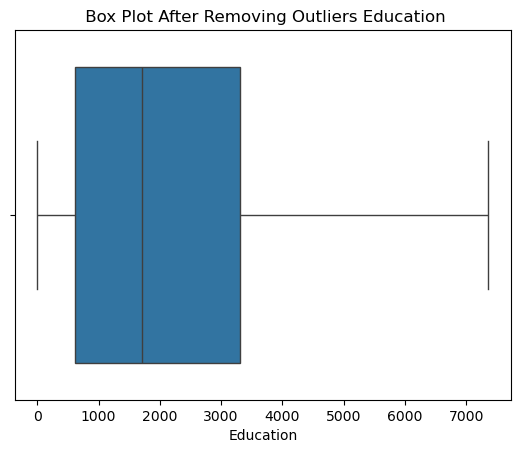

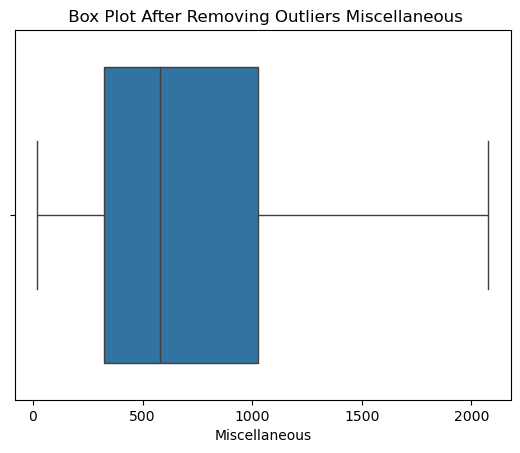

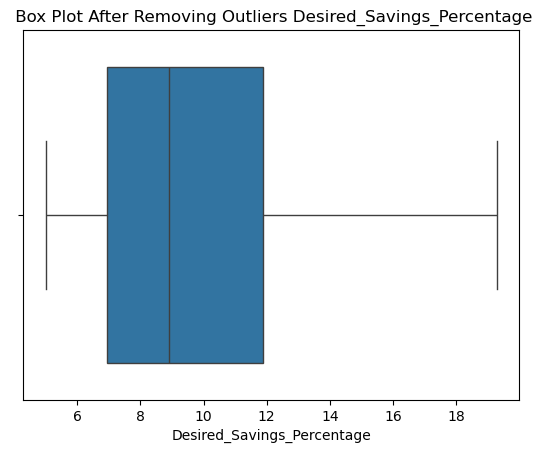

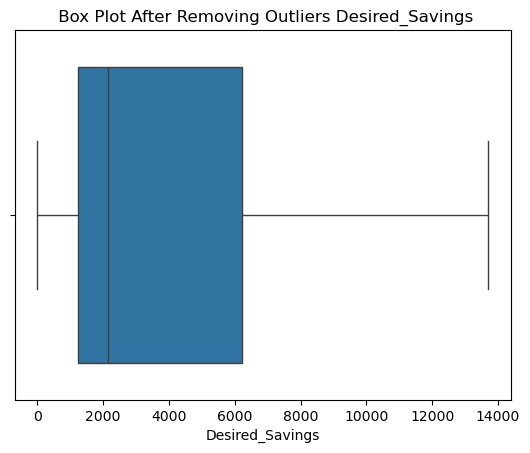

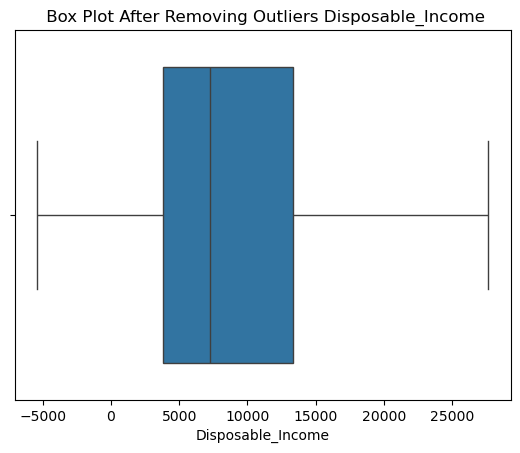

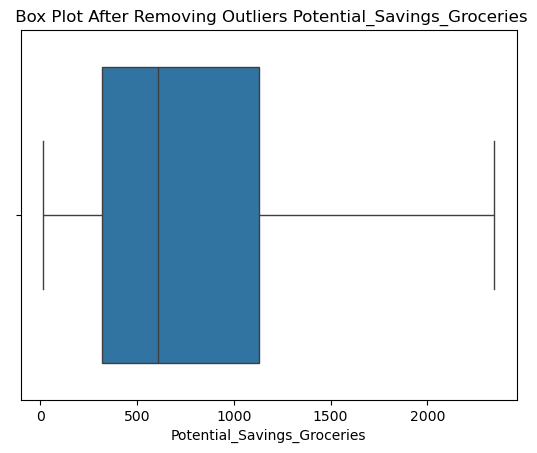

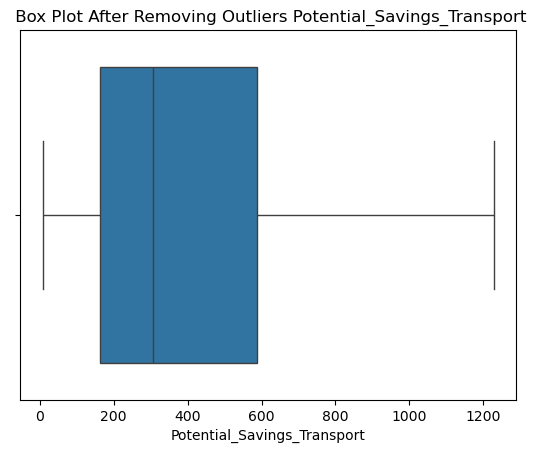

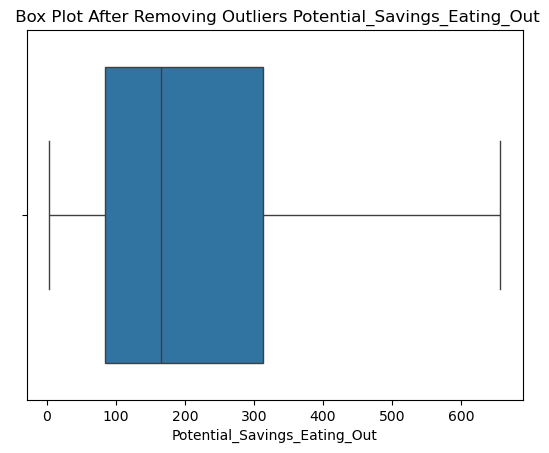

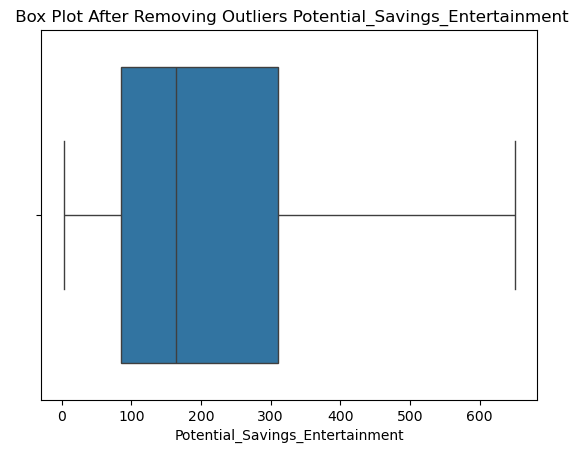

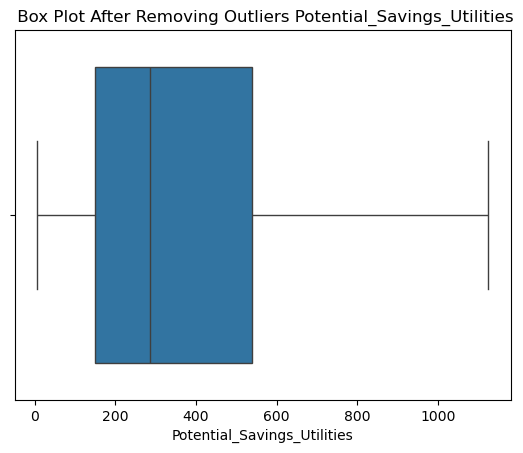

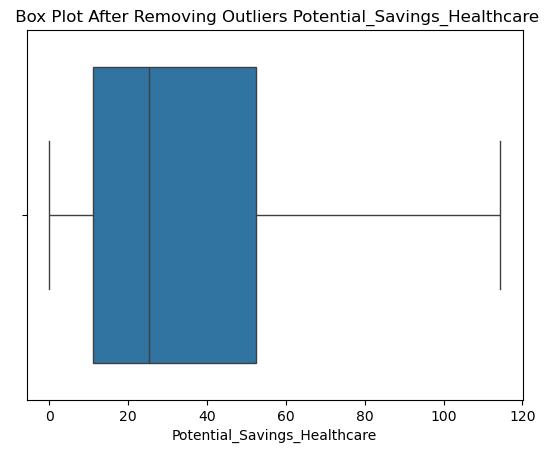

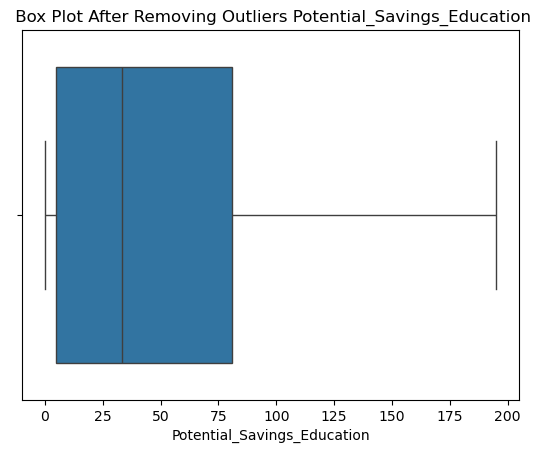

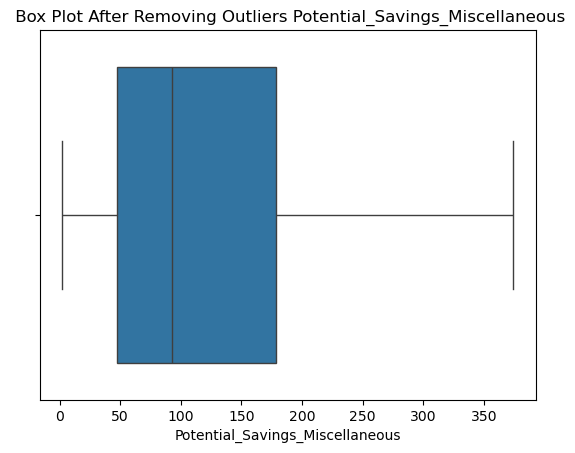

In [17]:
## Outliers after capping
for i in numeric_values.columns:
    plt.figure()
    sns.boxplot(data= df, x = i)
    plt.title(f" Box Plot After Removing Outliers {i}")
    plt.show()

In [27]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

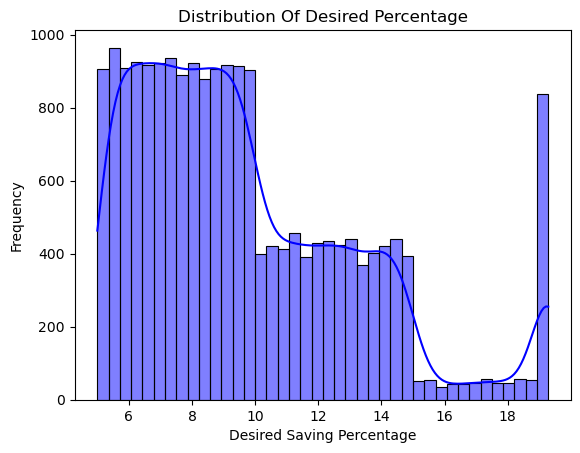

In [29]:
sns.histplot(df['Desired_Savings_Percentage'], kde= True, color= 'blue')
plt.title("Distribution Of Desired Percentage")
plt.xlabel('Desired Saving Percentage')
plt.ylabel('Frequency')
plt.show()

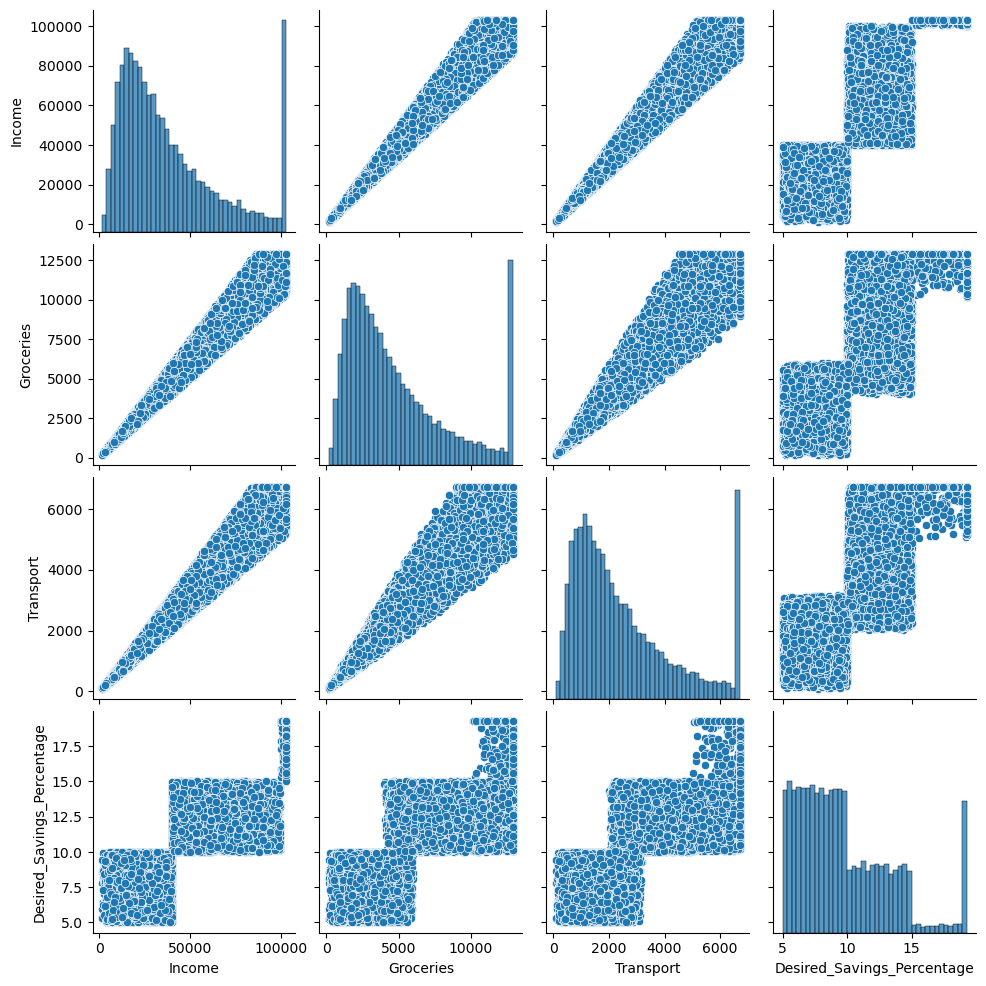

In [30]:
sns.pairplot(df, vars=['Income', 'Groceries', 'Transport', 'Desired_Savings_Percentage'])
plt.show()

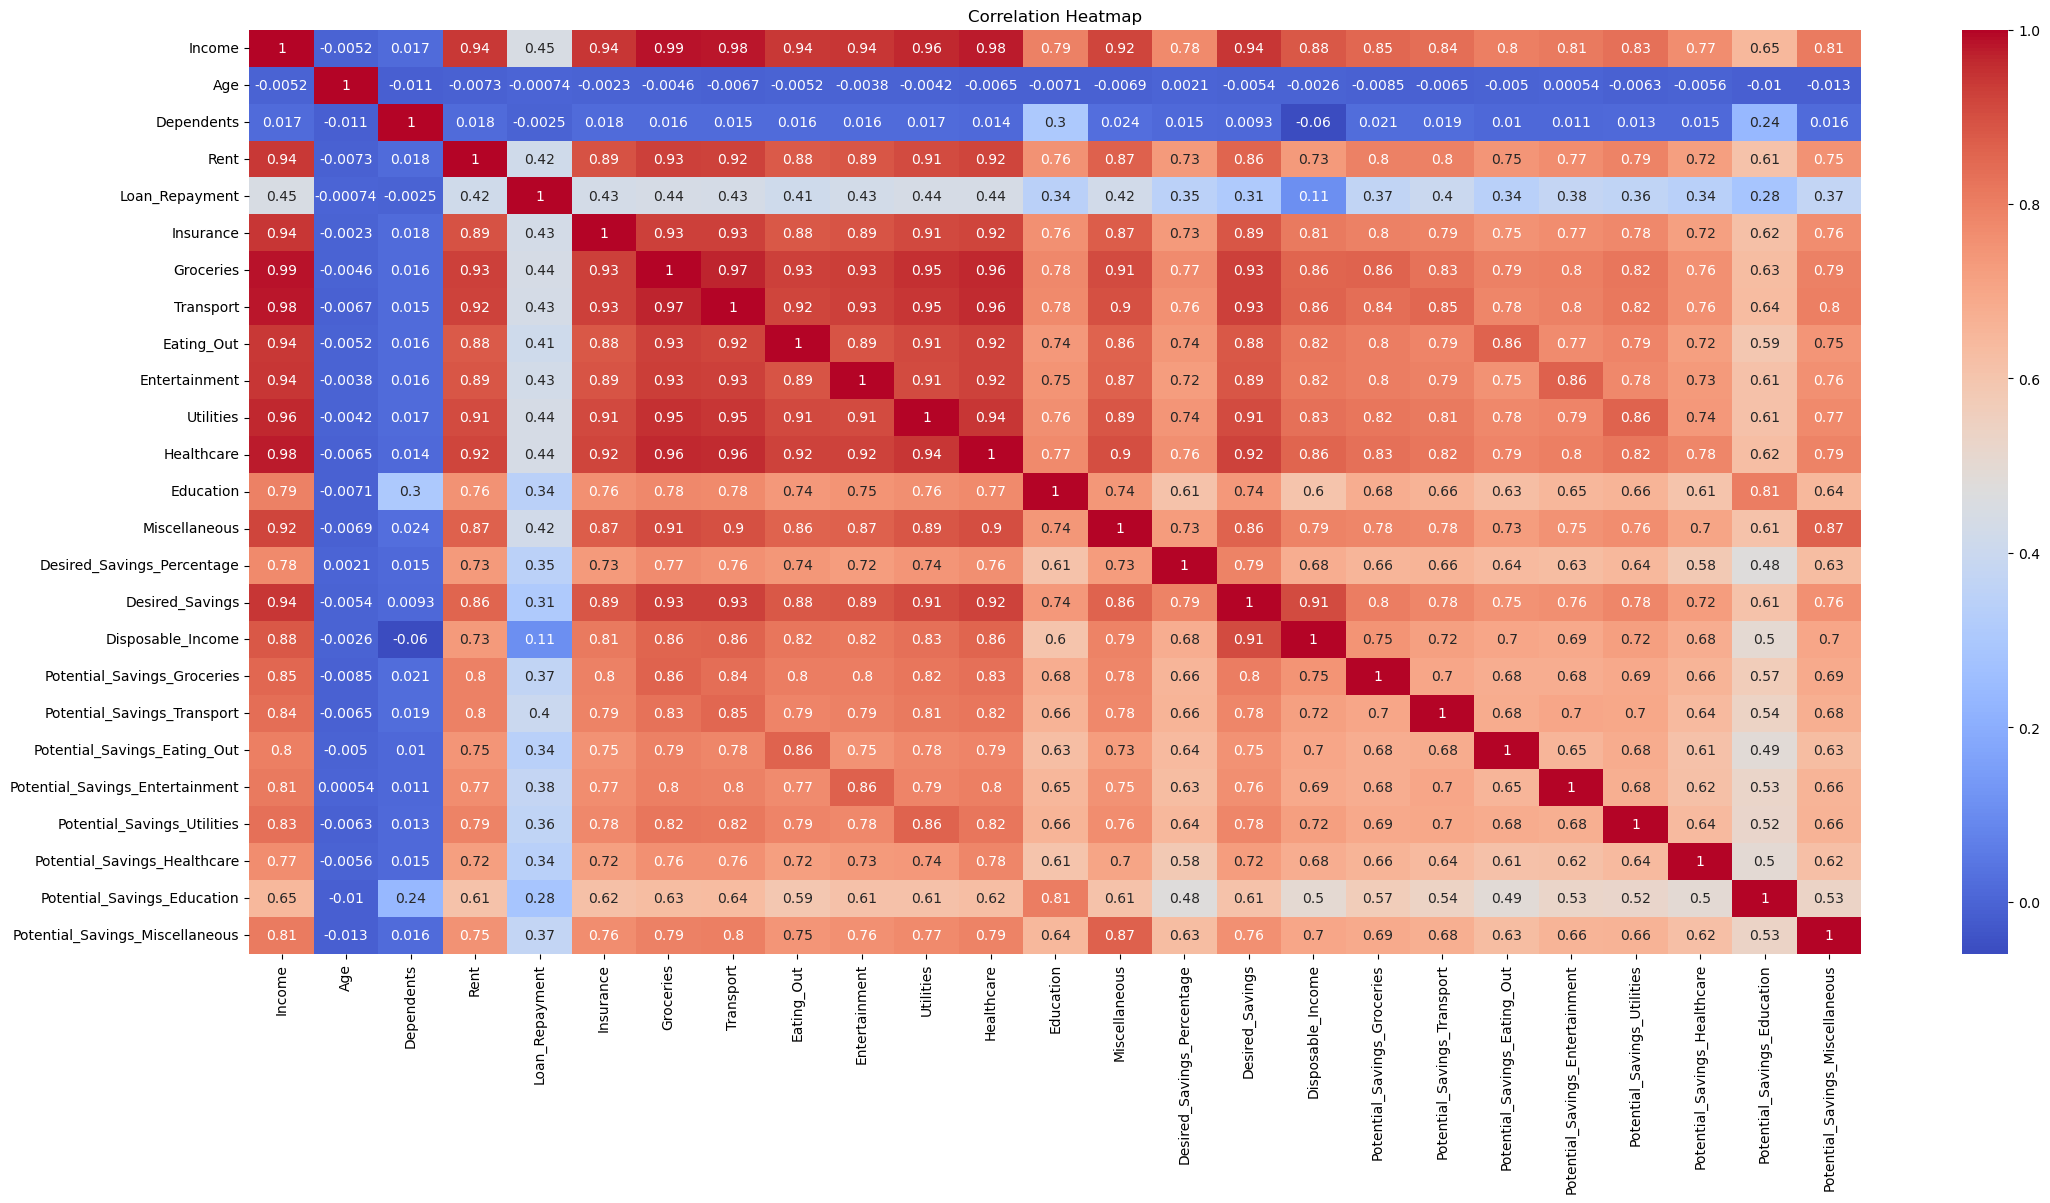

In [31]:
plt.figure(figsize=(26,12))
sns.heatmap(numeric_values.corr(), annot=True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

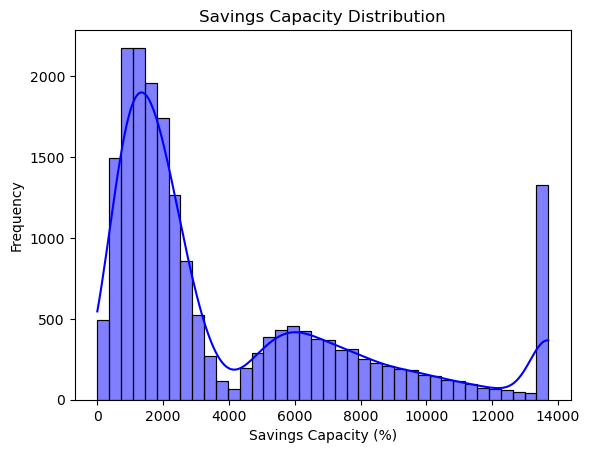

In [32]:
## Saving Capacity
sns.histplot(df['Desired_Savings'], kde=True, color='blue')
plt.title('Savings Capacity Distribution')
plt.xlabel('Savings Capacity (%)')
plt.ylabel('Frequency')
plt.show()

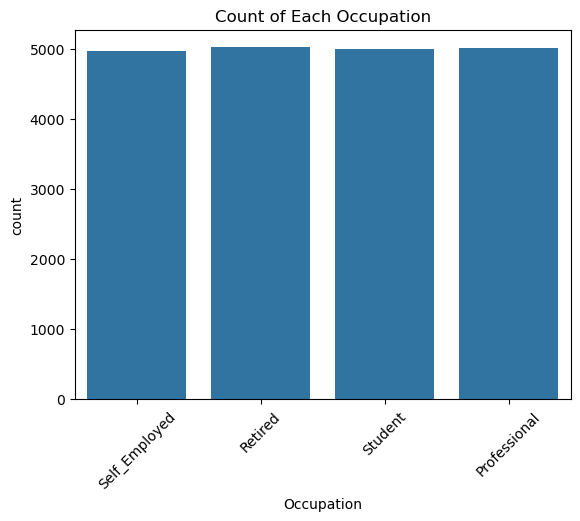

In [33]:
sns.countplot(x='Occupation', data=data)
plt.title('Count of Each Occupation')
plt.xticks(rotation=45)
plt.show()

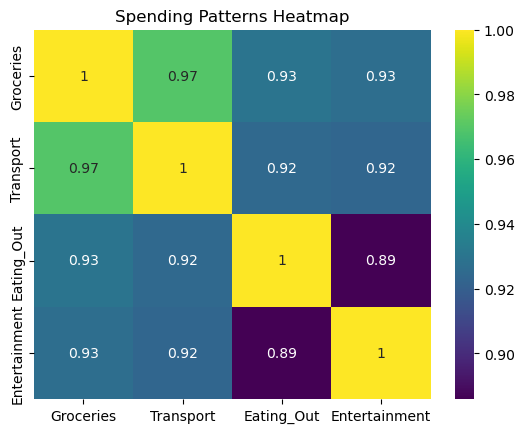

In [34]:
#Heatmap for Spending Patterns: Show correlations between different spending categories
expense_corr = df[['Groceries', 'Transport', 'Eating_Out', 'Entertainment']].corr()
sns.heatmap(expense_corr, annot=True, cmap='viridis')
plt.title('Spending Patterns Heatmap')
plt.show()

## FEATURE ENGINEERINIG

In [19]:
## Finding categoical columns
df_cat_columns= df.select_dtypes(include= ['object']).columns

In [21]:
print(f"Categorical columns are {df_cat_columns}")

Categorical columns are Index(['Occupation', 'City_Tier'], dtype='object')


In [23]:
## Using Label Encoder for 'City_tier' and One Hot Encoder for 'Occupation'
l_encoder= LabelEncoder()
df['City_Tier']= l_encoder.fit_transform(df['City_Tier'])

In [25]:
df # 0 is Tier_1, 1 is Tier_2, 2 is Tier_3

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49.0,0.0,Self_Employed,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34.0,2.0,Retired,1,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35.0,1.0,Student,2,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21.0,0.0,Self_Employed,2,15218.340037,6567.855801,3597.595115,12929.092167,6714.626751,...,13703.375068,27667.535306,1875.932770,762.020789,656.735296,320.190594,1125.438830,114.328207,0.000000,296.041183
4,24875.283548,52.0,4.0,Professional,1,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51.0,4.0,Self_Employed,0,12274.039853,6567.855801,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21.0,1.0,Student,1,18059.154528,0.000000,2770.589626,12929.092167,4633.108332,...,10613.589598,27667.535306,2344.988091,359.602765,656.735296,424.064224,1125.438830,114.328207,194.976047,351.436046
19997,40604.567373,30.0,1.0,Professional,1,8120.913475,6567.855801,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,103006.302213,27.0,2.0,Professional,0,22685.717860,6567.855801,3597.595115,12929.092167,6714.626751,...,10603.684814,10603.684814,2344.988091,1228.178379,656.735296,273.912367,859.230004,98.961780,92.189012,374.188992


In [27]:
df['Occupation'].unique()

array(['Self_Employed', 'Retired', 'Student', 'Professional'],
      dtype=object)

In [29]:
df= pd.get_dummies(df, columns=['Occupation'], drop_first= True)

In [31]:
df= df.astype(int)

In [43]:
df

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,...,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Occupation_Retired,Occupation_Self_Employed,Occupation_Student
0,44637,49,0,0,13391,0,2206,6658,2636,1651,...,328,465,195,678,67,0,85,0,1,0
1,26858,34,2,1,5371,0,869,2818,1543,649,...,119,141,234,286,6,56,97,1,0,0
2,50367,35,1,2,7555,4612,2201,6313,3221,1513,...,473,410,459,488,7,106,138,0,0,1
3,101455,21,0,2,15218,6567,3597,12929,6714,3646,...,762,656,320,1125,114,0,296,0,1,0
4,24875,52,4,1,4975,3112,635,3034,1276,692,...,68,61,187,194,47,67,96,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913,51,4,0,12274,6567,1646,5477,2084,1945,...,287,347,145,212,44,98,190,0,1,0
19996,90295,21,1,1,18059,0,2770,12929,4633,3646,...,359,656,424,1125,114,194,351,0,0,1
19997,40604,30,1,1,8120,6567,1548,6018,2493,896,...,379,138,297,824,57,72,122,0,0,0
19998,103006,27,2,0,22685,6567,3597,12929,6714,2545,...,1228,656,273,859,98,92,374,0,0,0


## FEATURE SELECTION

In [33]:
# Define features and target
X = df.drop(['Desired_Savings_Percentage'], axis=1)
y = df['Desired_Savings_Percentage']

In [46]:
X

,Income,Age,Dependents,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,...,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Occupation_Retired,Occupation_Self_Employed,Occupation_Student
0,44637,49,0,0,13391,0,2206,6658,2636,1651,...,328,465,195,678,67,0,85,0,1,0
1,26858,34,2,1,5371,0,869,2818,1543,649,...,119,141,234,286,6,56,97,1,0,0
2,50367,35,1,2,7555,4612,2201,6313,3221,1513,...,473,410,459,488,7,106,138,0,0,1
3,101455,21,0,2,15218,6567,3597,12929,6714,3646,...,762,656,320,1125,114,0,296,0,1,0
4,24875,52,4,1,4975,3112,635,3034,1276,692,...,68,61,187,194,47,67,96,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913,51,4,0,12274,6567,1646,5477,2084,1945,...,287,347,145,212,44,98,190,0,1,0
19996,90295,21,1,1,18059,0,2770,12929,4633,3646,...,359,656,424,1125,114,194,351,0,0,1
19997,40604,30,1,1,8120,6567,1548,6018,2493,896,...,379,138,297,824,57,72,122,0,0,0
19998,103006,27,2,0,22685,6567,3597,12929,6714,2545,...,1228,656,273,859,98,92,374,0,0,0


In [47]:
y

0        13
1         7
2        13
3        16
4         7
         ..
19995    12
19996    11
19997    13
19998    17
19999     6
Name: Desired_Savings_Percentage, Length: 20000, dtype: int32

In [35]:
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

In [37]:
selected_features = X.columns[selector.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['Income', 'Rent', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Desired_Savings'],
      dtype='object')

Feature Scores:
                            Feature         Score
15                  Desired_Savings  72973.166082
0                            Income  45191.098855
7                         Groceries  41689.713879
8                         Transport  40564.590428
12                       Healthcare  39383.785907
11                        Utilities  36005.574451
4                              Rent  32773.696939
6                         Insurance  31951.859273
10                    Entertainment  31723.884717
9                        Eating_Out  31643.049135
14                    Miscellaneous  28103.948326
16                Disposable_Income  21200.811646
18      Potential_Savings_Transport  19374.833754
17      Potential_Savings_Groceries  19304.268753
21      Potential_Savings_Utilities  17364.

## Split Data into Training and Testing Sets

In [39]:
# Train test split
X_train_selected,X_test_selected,y_train,y_test= train_test_split(X_selected,y, test_size=0.2, random_state=42)

In [41]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train_selected.shape) 
print("Test set shape (features):", X_test_selected.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (16000, 10)
Test set shape (features): (4000, 10)
Training set shape (target): (16000,)
Test set shape (target): (4000,)


In [43]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_selected)
X_test_scaled= scaler.transform(X_test_selected)

In [45]:
# Convert back to DataFrame for easier handling 
X_normalized_df = pd.DataFrame(X_train_scaled, columns=selected_features) 

print(X_normalized_df.head())

     Income      Rent  Insurance  Groceries  Transport  Eating_Out  \
0  0.165619  0.043277   0.108258   0.298355   0.393533    0.230092   
1 -0.987774 -0.799626  -0.937318  -0.909328  -1.052451   -0.968882   
2  0.943311  1.788544   0.031827   1.196041   1.447698    1.650572   
3 -1.189025 -1.216013  -1.202278  -1.219326  -1.193863   -1.068458   
4 -0.977755 -0.978334  -1.023939  -0.888370  -1.065307   -1.105037   

   Entertainment  Utilities  Healthcare  Desired_Savings  
0       0.087156   0.019724    0.039915         0.544170  
1      -0.863265  -1.061305   -1.075813        -0.858626  
2       1.465113   1.410644    0.789787         1.387795  
3      -1.090874  -1.195910   -1.125744        -0.931149  
4      -0.871467  -0.841749   -1.009541        -0.795328  


## MODEL BUILDING

In [47]:
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(), 
    'Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    'Support Vector Regressor':SVR()
}

## MODEL EVALUATION

In [49]:
results = {} #Used to store evaluation results

for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    
    y_pred = model.predict(X_test_selected)

    #Model evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Store the results
    results[model_name] = {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE       MSE      RMSE        R2
Linear Regression            1.240888  2.847813  1.687547  0.773859
Decision Tree Regressor      0.340449  0.698252  0.835615  0.944553
Random Forest Regressor      0.315166  0.376368  0.613488  0.970113
Gradiant Boosting Regressor  0.542894  0.546948  0.739559  0.956568
Support Vector Regressor     0.777614  1.715682  1.309840  0.863760


In [59]:
best_model = results_df['R2'].idxmax()
print("The best regression model is:",best_model)

The best regression model is: Random Forest Regressor


In [51]:
# Training Random Forest model 
model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train_scaled, y_train) 

# Predict on training and test sets 
y_train_pred = model.predict(X_train_scaled) 
y_test_pred = model.predict(X_test_scaled) 

# Calculate metrics 
train_mse = mean_squared_error(y_train, y_train_pred) 
test_mse = mean_squared_error(y_test, y_test_pred) 

print(f"Training MSE: {train_mse}") 
print(f"Test MSE: {test_mse}")

Training MSE: 0.09188004148974235
Test MSE: 0.3680184291580699


In [ ]:
from sklearn.model_selection import GridSearchCV

In [68]:

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [153]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [154]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score= grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Model:",best_model)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Model: RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=300,
                      random_state=42)
Best Score: 0.9707011188190933


In [157]:
# Evaluate the best model
# Train the best model from Grid Search on the entire training data
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Test MSE: 0.35239187075402795


## CREATING PIPELINE

In [219]:
from sklearn.impute import SimpleImputer
from joblib import dump, load

In [331]:
# Save the pipeline to a file
joblib.dump(pipeline, 'Best_model_pipeline.joblib')

print("Model saved as 'Best_model_pipeline.joblib'")

Model saved as 'Best_model_pipeline.joblib'


In [227]:
# Load the saved model
loaded_model = joblib.load('Best_model_pipeline.joblib')
loaded_model 

Pipeline(steps=[('Imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [281]:
# Defining the columns
columns=[
    "Income", "Rent", "Insurance", "Groceries", "Transport",
    "Eating_Out", "Entertainment", "Utilities","Healthcare", "Desired_Savings", "Desired_Savings_Percentage"
]

In [249]:
df.Desired_Savings_Percentage

0        13
1         7
2        13
3        16
4         7
         ..
19995    12
19996    11
19997    13
19998    17
19999     6
Name: Desired_Savings_Percentage, Length: 20000, dtype: int32

In [283]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic unseen data
data = pd.DataFrame({
    "Income": np.random.randint(2000, 70000, 10),        # Income (2,000 - 70,000)
    "Rent": np.random.randint(2000, 20000, 10),          # Rent (2,000 - 20,000)
    "Insurance": np.random.randint(500, 5000, 10),       # Insurance (500 - 5,000)
    "Groceries": np.random.randint(100, 5000, 10),       # Groceries (500 - 5,000)
    "Transport": np.random.randint(100, 5000, 10),       # Transport (100 - 5,000)
    "Eating_Out": np.random.randint(100, 5000, 10),      # Eating out(100 - 5000)
    "Entertainment": np.random.randint(0, 2000, 10),     # Entertainment (0 - 2,000)
    "Utilities": np.random.randint(500, 3000, 10),       # Utilities (500 - 3,000)
    "Healthcare":np.random.randint(100, 5000, 10),       # Healthcare(100 - 5000)   
    "Desired_Savings": np.random.randint(0, 15000, 10),  
    "Desired_Savings_Percentage":np.random.uniform(5, 20, 10)
})
print("Unseen Data:")
print(data)

Unseen Data:
   Income   Rent  Insurance  Groceries  Transport  Eating_Out  Entertainment  \
0   17795   2769       3234       2535       2656        3561            455   
1    2860   4433       3505        700        875        2713           1485   
2   56886   7311       2399       2463       4114        3943           1750   
3    8265   7051       1767       2161        134        1600           1275   
4   39194   8420       2028        341       3252        4898           1016   
5   46131  19568       3702       2141       2055         261           1725   
6   62263   8396       4056       2924       1685        4397            295   
7   18023  10666       4390       2712       4043        2081           1748   
8   43090   4747       1146       1463       3173        1095            719   
9   69221   2189       3388       1578       1121        3442           1772   

   Utilities  Healthcare  Desired_Savings  Desired_Savings_Percentage  
0        837        2162          

In [285]:
unseen_data= pd.DataFrame(data, columns=columns)

In [287]:
# converting to csv file
unseen_data.to_csv('unseen_data.csv',index=False)

In [289]:
unseen_data

,Income,Rent,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Desired_Savings,Desired_Savings_Percentage
0,17795,2769,3234,2535,2656,3561,455,837,2162,5892,5.953375
1,2860,4433,3505,700,875,2713,1485,1378,3984,3561,9.664735
2,56886,7311,2399,2463,4114,3943,1750,1576,164,10470,9.877750
3,8265,7051,1767,2161,134,1600,1275,1291,2668,6184,15.944093
4,39194,8420,2028,341,3252,4898,1016,2764,2127,3099,14.563362
5,46131,19568,3702,2141,2055,261,1725,1263,2795,6278,18.308191
6,62263,8396,4056,2924,1685,4397,295,2735,1595,8392,12.083224
7,18023,10666,4390,2712,4043,2081,1748,879,491,14151,6.793914
8,43090,4747,1146,1463,3173,1095,719,992,4614,13067,15.698672
9,69221,2189,3388,1578,1121,3442,1772,1680,4574,3104,16.411776


In [291]:
unseen_data.shape

(10, 11)

In [293]:
X_unseen= unseen_data.drop(columns=['Desired_Savings_Percentage'])
y_unseen= unseen_data['Desired_Savings_Percentage']

In [297]:
X_train1, X_test1, y_train1, y_test2= train_test_split(X_unseen, y_unseen,test_size=0.2, random_state=42)

In [299]:
pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy= 'mean')),
    ('scaler', StandardScaler()),  # Scaling
    ('model', RandomForestRegressor(random_state=42))  # Model
])

In [307]:
pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('Imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [315]:
y_pred1= loaded_model.predict(X_unseen)

In [319]:
# Print model performance on unseen data
print(f"Model Performance on Unseen Data:")

# Mean Absolute Error
print(f"MAE: {mean_absolute_error(y_unseen, y_pred1):.2f}")

# Mean Squared Error
print(f"MSE: {mean_squared_error(y_unseen, y_pred1):.2f}")

# Root Mean Squared Error
print(f"RMSE: {np.sqrt(mean_squared_error(y_unseen, y_pred1)):.2f}")

# R² Score
print(f"R²: {r2_score(y_unseen, y_pred1):.4f}")

Model Performance on Unseen Data:
MAE: 1.89
MSE: 5.73
RMSE: 2.39
R²: 0.6547


In [321]:
# Ensure unseen data matches selected features
X_unseen = unseen_data[selected_features]

# Apply pipeline for prediction
predictions = pipeline.predict(X_unseen)

# Add predictions to unseen data
unseen_data['Predicted_Desired_Savings_Percentage'] = predictions

# Print unseen data with predictions
print("\nUnseen Data with Predictions:")
print(unseen_data)


Unseen Data with Predictions:
   Income   Rent  Insurance  Groceries  Transport  Eating_Out  Entertainment  \
0   17795   2769       3234       2535       2656        3561            455   
1    2860   4433       3505        700        875        2713           1485   
2   56886   7311       2399       2463       4114        3943           1750   
3    8265   7051       1767       2161        134        1600           1275   
4   39194   8420       2028        341       3252        4898           1016   
5   46131  19568       3702       2141       2055         261           1725   
6   62263   8396       4056       2924       1685        4397            295   
7   18023  10666       4390       2712       4043        2081           1748   
8   43090   4747       1146       1463       3173        1095            719   
9   69221   2189       3388       1578       1121        3442           1772   

   Utilities  Healthcare  Desired_Savings  Desired_Savings_Percentage  \
0        837   

In [327]:
unseen_data.to_csv('unseen_data.csv',index=False)

In [329]:
unseen_data

,Income,Rent,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Desired_Savings,Desired_Savings_Percentage,Predicted_Desired_Savings_Percentage
0,17795,2769,3234,2535,2656,3561,455,837,2162,5892,5.953375,8.804048
1,2860,4433,3505,700,875,2713,1485,1378,3984,3561,9.664735,15.152457
2,56886,7311,2399,2463,4114,3943,1750,1576,164,10470,9.877750,10.712948
3,8265,7051,1767,2161,134,1600,1275,1291,2668,6184,15.944093,14.885380
4,39194,8420,2028,341,3252,4898,1016,2764,2127,3099,14.563362,13.595462
5,46131,19568,3702,2141,2055,261,1725,1263,2795,6278,18.308191,16.319543
6,62263,8396,4056,2924,1685,4397,295,2735,1595,8392,12.083224,11.468561
7,18023,10666,4390,2712,4043,2081,1748,879,491,14151,6.793914,8.016021
8,43090,4747,1146,1463,3173,1095,719,992,4614,13067,15.698672,12.533991
9,69221,2189,3388,1578,1121,3442,1772,1680,4574,3104,16.411776,15.751645
